### Generate Data --- MODE

In [1]:
import os, random, json, re
import pandas as pd
import numpy as np
from tqdm import trange, tqdm
import numpy as np
from collections import Counter
TASK = "mode"

In [23]:
# length_extrapolation
samples_per_num_digit = 1000
data = {}
for num_digit in trange(129, 257):
    unique_buckets = set()
    strings = []
    while len(strings) < samples_per_num_digit:
        partition = sorted(random.sample(list(range(1, num_digit+10)), 9))
        prev = 0
        buckets = []
        for b in partition:
            buckets.append(b-prev-1)
            prev = b
        buckets.append(num_digit+10-prev-1)
        s = "".join([str(d)*n for n, d in zip(buckets, list(range(10)))])

        try: 
            most_common1, most_common2 = Counter(s).most_common(2)
            if most_common1[1] == most_common2[1]: continue # to ensure mode is unique
        except ValueError: continue # to ensure there are at least 2 distinct digits

        if "".join([str(x) for x in buckets]) not in unique_buckets:
            unique_buckets.add("".join([str(x) for x in buckets]))
            strings.append("".join(random.sample(s, len(s))))

    data[num_digit] = strings
#json.dump(data, open(f"../data/finetune/{TASK}/finetune.json", "w"), indent=2)
json.dump(data, open(f"../data/finetune/{TASK}/finetune_129_256.json", "w"), indent=2)
            

100%|██████████| 128/128 [00:09<00:00, 13.60it/s]


In [27]:
# uniform, uniform_hard, uniform_hard+
samples_per_num_digit = 1000
data = {}
for num_digit in trange(6, 65):
    unique_buckets = set()
    strings = []
    while len(strings) < samples_per_num_digit:
        partition = sorted(random.sample(list(range(1, num_digit+10)), 9))
        prev = 0
        buckets = []
        for b in partition:
            buckets.append(b-prev-1)
            prev = b
        buckets.append(num_digit+10-prev-1)
        s = "".join([str(d)*n for n, d in zip(buckets, list(range(10)))])

        try: 
            counts = Counter(s).most_common()
            if counts[0][1] == counts[1][1]: continue # to ensure mode is unique
            if counts[0][1] - counts[2][1] > 10: continue # to ensure the most_common frequency - the third_common frequency <= 10
        except IndexError: continue # to ensure there are at least 2 distinct digits

        if "".join([str(x) for x in buckets]) not in unique_buckets:
            unique_buckets.add("".join([str(x) for x in buckets]))
            strings.append("".join(random.sample(s, len(s))))

    data[num_digit] = strings

json.dump(data, open(f"../data/finetune/{TASK}/finetune_hard_6_64.json", "w"), indent=2)
            


100%|██████████| 59/59 [00:01<00:00, 32.14it/s]


In [22]:
# Uniform split
samples_per_num_digit_train, samples_per_num_digit_val = 100, 100

data = json.load(open(f"../data/finetune/{TASK}/finetune.json", "r"))
print("samples_per_num_digit = {}".format(len(data[list(data.keys())[0]])))

answers = []

train = pd.DataFrame(columns=["input_str", "answer"])
val = pd.DataFrame(columns=["input_str", "answer"])
for num_digit in tqdm(data):
    for s in data[num_digit][:samples_per_num_digit_train]:
        answer = Counter(s).most_common(1)[0][0]
        answers.append(answer)
        row = {
            "input_str": [s],
            "answer": [answer]
        }
        row = pd.DataFrame(row)
        train = pd.concat([train, pd.DataFrame(row)])
    for s in data[num_digit][
        samples_per_num_digit_train:samples_per_num_digit_train+samples_per_num_digit_val
    ]:
        row = {
            "input_str": [s],
            "answer": [Counter(s).most_common(1)[0][0]]
        }
        row = pd.DataFrame(row)
        val = pd.concat([val, pd.DataFrame(row)])
print(len(train), len(val))

print("Check if answers are uniformly distributed across 0-9")
print(Counter(answers).most_common(10))
train.to_csv(f"../data/finetune/{TASK}/uniform_split/train.csv", index=False)
val.to_csv(f"../data/finetune/{TASK}/uniform_split/val.csv", index=False)

#val.to_csv(f"../data/finetune/{TASK}/uniform_large_split/val.csv", index=False)


samples_per_num_digit = 1000


  0%|          | 0/123 [00:00<?, ?it/s]

100%|██████████| 123/123 [00:06<00:00, 19.04it/s]


12300 12300
Check if answers are uniformly distributed across 0-9
[('9', 1270), ('8', 1260), ('7', 1243), ('2', 1233), ('5', 1230), ('6', 1230), ('4', 1225), ('3', 1216), ('1', 1212), ('0', 1181)]


In [8]:
# length_extrapolation split
samples_per_num_digit_train, samples_per_num_digit_val = 0, 900

data = json.load(open(f"../data/finetune/{TASK}/finetune_129_256.json", "r"))
print("samples_per_num_digit = {}".format(len(data[list(data.keys())[0]])))

train = pd.DataFrame(columns=["input_str", "answer"])
val = pd.DataFrame(columns=["input_str", "answer"])
for num_digit in tqdm(data):
    for s in data[num_digit][:samples_per_num_digit_train]:
        row = {
            "input_str": [s],
            "answer": [Counter(s).most_common(1)[0][0]]
        }
        row = pd.DataFrame(row)
        train = pd.concat([train, pd.DataFrame(row)])
    for s in data[num_digit][
        samples_per_num_digit_train:samples_per_num_digit_train+samples_per_num_digit_val
    ]:
        row = {
            "input_str": [s],
            "answer": [Counter(s).most_common(1)[0][0]]
        }
        row = pd.DataFrame(row)
        val = pd.concat([val, pd.DataFrame(row)])
print(len(train), len(val))

val.to_csv(f"../data/finetune/{TASK}/length_extrapolation_large/val.csv", index=False)

samples_per_num_digit = 1000


  0%|          | 0/128 [00:00<?, ?it/s]

100%|██████████| 128/128 [01:36<00:00,  1.32it/s]


0 115200


In [4]:
# Uniform hard split
samples_per_num_digit_train, samples_per_num_digit_val = 100, 100

data = json.load(open(f"../data/finetune/{TASK}/finetune_hard+.json", "r"))
print("samples_per_num_digit = {}".format(len(data[list(data.keys())[0]])))

answers = []

train = pd.DataFrame(columns=["input_str", "answer"])
val = pd.DataFrame(columns=["input_str", "answer"])
for num_digit in tqdm(data):
    if int(num_digit) > 64: continue
    for s in data[num_digit][:samples_per_num_digit_train]:
        answer = Counter(s).most_common(1)[0][0]
        answers.append(answer)
        row = {
            "input_str": [s],
            "answer": [answer]
        }
        row = pd.DataFrame(row)
        train = pd.concat([train, pd.DataFrame(row)])
    for s in data[num_digit][
        samples_per_num_digit_train:samples_per_num_digit_train+samples_per_num_digit_val
    ]:
        row = {
            "input_str": [s],
            "answer": [Counter(s).most_common(1)[0][0]]
        }
        row = pd.DataFrame(row)
        val = pd.concat([val, pd.DataFrame(row)])
print(len(train), len(val))

print("Check if answers are uniformly distributed across 0-9")
print(Counter(answers).most_common(10))
train.to_csv(f"../data/finetune/{TASK}/uniform_hard+_6_64_split/train.csv", index=False)
val.to_csv(f"../data/finetune/{TASK}/uniform_hard+_6_64_split/val.csv", index=False)

#val.to_csv(f"../data/finetune/{TASK}/uniform_large_split/val.csv", index=False)


samples_per_num_digit = 1000


  0%|          | 0/123 [00:00<?, ?it/s]

100%|██████████| 123/123 [00:02<00:00, 43.70it/s]

5900 5900
Check if answers are uniformly distributed across 0-9
[('6', 616), ('4', 612), ('9', 609), ('7', 596), ('8', 592), ('5', 590), ('1', 587), ('2', 583), ('0', 565), ('3', 550)]


In [3]:
# Random labels
samples_per_num_digit_train, samples_per_num_digit_val = 100, 100

data = json.load(open(f"../data/finetune/{TASK}/finetune.json", "r"))
print("samples_per_num_digit = {}".format(len(data[list(data.keys())[0]])))

answers = []

train = pd.DataFrame(columns=["input_str", "answer"])
val = pd.DataFrame(columns=["input_str", "answer"])
for num_digit in tqdm(data):
    for s in data[num_digit][:samples_per_num_digit_train]:
        answer = random.choice("0123456789")
        answers.append(answer)
        row = {
            "input_str": [s],
            "answer": [answer]
        }
        row = pd.DataFrame(row)
        train = pd.concat([train, pd.DataFrame(row)])
        val = pd.concat([val, pd.DataFrame(row)])
print(len(train), len(val))

print("Check if answers are uniformly distributed across 0-9")
print(Counter(answers).most_common(10))
train.to_csv(f"../data/finetune/{TASK}/random_labels/train.csv", index=False)
val.to_csv(f"../data/finetune/{TASK}/random_labels/val.csv", index=False)


samples_per_num_digit = 1000


100%|██████████| 123/123 [00:05<00:00, 22.21it/s]


12300 12300
Check if answers are uniformly distributed across 0-9
[('1', 1279), ('5', 1259), ('2', 1257), ('7', 1257), ('0', 1250), ('9', 1242), ('8', 1220), ('6', 1215), ('4', 1161), ('3', 1160)]


### Draft

In [2]:
# odd_even_3:1 split
samples_per_num_digit_val = 100

data = json.load(open(f"../data/finetune/{TASK}/finetune.json", "r"))
print("samples_per_num_digit = {}".format(len(data[list(data.keys())[0]])))

train = pd.DataFrame(columns=["input_str", "answer"])
val = pd.DataFrame(columns=["input_str", "answer"])
for num_digit in tqdm(data):
    if int(num_digit)%2 == 1: samples_per_num_digit_train = 150
    else: samples_per_num_digit_train = 50
    for s in data[num_digit][:samples_per_num_digit_train]:
        s1, s2 = s.split(" + ")
        s1, s2 = int(s1), int(s2)
        row = {
            "input_str": [s],
            "answer": [str(s1+s2)]
        }
        row = pd.DataFrame(row)
        train = pd.concat([train, pd.DataFrame(row)])
    for s in data[num_digit][
        samples_per_num_digit_train:samples_per_num_digit_train+samples_per_num_digit_val
    ]:
        s1, s2 = s.split(" + ")
        s1, s2 = int(s1), int(s2)
        row = {
            "input_str": [s],
            "answer": [str(s1+s2)]
        }
        row = pd.DataFrame(row)
        val = pd.concat([val, pd.DataFrame(row)])
print(len(train), len(val))

train.to_csv(f"../data/finetune/{TASK}/odd_even_3:1_split/train.csv", index=False)
val.to_csv(f"../data/finetune/{TASK}/odd_even_3:1_split/val.csv", index=False)


samples_per_num_digit = 1000


100%|██████████| 126/126 [00:06<00:00, 18.37it/s]


12600 12600


In [3]:
# odd_even_9:1 split
samples_per_num_digit_val = 100

data = json.load(open(f"../data/finetune/{TASK}/finetune.json", "r"))
print("samples_per_num_digit = {}".format(len(data[list(data.keys())[0]])))

train = pd.DataFrame(columns=["input_str", "answer"])
val = pd.DataFrame(columns=["input_str", "answer"])
for num_digit in tqdm(data):
    if int(num_digit)%2 == 1: samples_per_num_digit_train = 180
    else: samples_per_num_digit_train = 20
    for s in data[num_digit][:samples_per_num_digit_train]:
        s1, s2 = s.split(" + ")
        s1, s2 = int(s1), int(s2)
        row = {
            "input_str": [s],
            "answer": [str(s1+s2)]
        }
        row = pd.DataFrame(row)
        train = pd.concat([train, pd.DataFrame(row)])
    for s in data[num_digit][
        samples_per_num_digit_train:samples_per_num_digit_train+samples_per_num_digit_val
    ]:
        s1, s2 = s.split(" + ")
        s1, s2 = int(s1), int(s2)
        row = {
            "input_str": [s],
            "answer": [str(s1+s2)]
        }
        row = pd.DataFrame(row)
        val = pd.concat([val, pd.DataFrame(row)])
print(len(train), len(val))

train.to_csv(f"../data/finetune/{TASK}/odd_even_9:1_split/train.csv", index=False)
val.to_csv(f"../data/finetune/{TASK}/odd_even_9:1_split/val.csv", index=False)


samples_per_num_digit = 1000


100%|██████████| 126/126 [00:06<00:00, 18.19it/s]


12600 12600


In [4]:
# odd_only split
samples_per_num_digit_val = 100

data = json.load(open(f"../data/finetune/{TASK}/finetune.json", "r"))
print("samples_per_num_digit = {}".format(len(data[list(data.keys())[0]])))

train = pd.DataFrame(columns=["input_str", "answer"])
val = pd.DataFrame(columns=["input_str", "answer"])
for num_digit in tqdm(data):
    if int(num_digit)%2 == 1: samples_per_num_digit_train = 100
    else: samples_per_num_digit_train = 0
    for s in data[num_digit][:samples_per_num_digit_train]:
        s1, s2 = s.split(" + ")
        s1, s2 = int(s1), int(s2)
        row = {
            "input_str": [s],
            "answer": [str(s1+s2)]
        }
        row = pd.DataFrame(row)
        train = pd.concat([train, pd.DataFrame(row)])
    for s in data[num_digit][
        samples_per_num_digit_train:samples_per_num_digit_train+samples_per_num_digit_val
    ]:
        s1, s2 = s.split(" + ")
        s1, s2 = int(s1), int(s2)
        row = {
            "input_str": [s],
            "answer": [str(s1+s2)]
        }
        row = pd.DataFrame(row)
        val = pd.concat([val, pd.DataFrame(row)])
print(len(train), len(val))

train.to_csv(f"../data/finetune/{TASK}/odd_only_split/train.csv", index=False)
val.to_csv(f"../data/finetune/{TASK}/odd_only_split/val.csv", index=False)


samples_per_num_digit = 1000


100%|██████████| 126/126 [00:05<00:00, 25.01it/s]

6300 12600


### Compute ACC

In [1]:
from collections import Counter
import json, re, math, sys
from pprint import pprint
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
sys.path.append("../scripts/")
from helper import *

In [2]:
exp_handle = "1208_130832"
infr_handle = "0326_121127"
split = "test"
with open(f"../scripts/llama/output/{exp_handle}/{split}_samples/{infr_handle}.txt", "r") as f:
    lines = f.readlines()
    filename = json.loads(lines[0])['data_dir']

header, lines = json.loads(lines[0]), lines[1:]
pprint(header)

df = pd.read_csv(f"{filename[3:]}/val.csv")

em = 0
errors = []
histogram_wrt_length = Counter()
all_preds = []
for l, input_str in zip(lines, df['input_str'].to_list()):
    _gth, _pred = json.loads(l)[:2]
    gth = int(_gth.split(".")[0])
    pred = -1
    find = re.findall(r'(\d+)', _pred)
    if find: pred = int(find[0])
    all_preds.append(pred)
    cor = int(gth == pred)
    #if set(str(gth)) == set(str(pred)): cor = 1
    em += cor
    if cor == 0: 
        errors.append((gth, pred))
        histogram_wrt_length[len(input_str)] += 1
print(f"testing acc = {em / len(lines)}") 

{'data_dir': '../../data/finetune/mode/length_extrapolation',
 'load_from_ckpt': 'checkpoint-6921'}
testing acc = 0.983984375


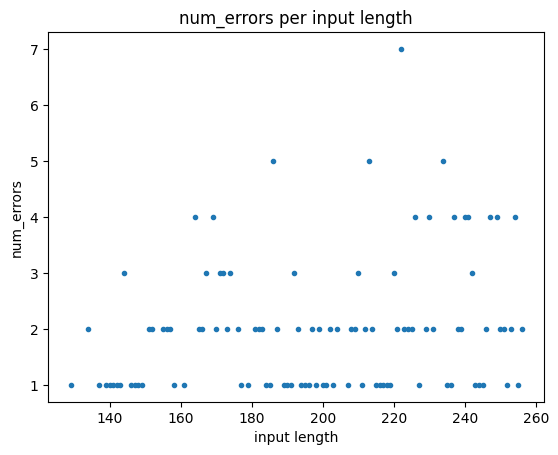

In [3]:
plt.figure()

plt.plot(list(histogram_wrt_length.keys()), list(histogram_wrt_length.values()), ".")
plt.xlabel("input length")
plt.ylabel("num_errors")
plt.title("num_errors per input length")
plt.show()

In [4]:
count = 0
for e in errors:
    if set(str(e[0])) == set(str(e[1])): count += 1
    #else: print(e)
print(count, round(count/len(errors), 2))

5 0.02


### Analysis

In [3]:
train_df = pd.read_csv("../data/finetune/mode/uniform_hard_split/train.csv")
train_df.head()

,input_str,answer
0,844887,8
1,741747,7
2,391444,4
3,047188,8
4,662931,6


In [5]:
unique_tr_buckets = []
largest_bucket_size = 0
for s in train_df['input_str']:
    buckets = [s.count(d) for d in "0123456789"]
    largest_bucket_size = max(largest_bucket_size, max(buckets))
    unique_tr_buckets.append("|".join([str(x) for x in buckets]))
print(len(set(unique_tr_buckets)))
print(f"largest bucket_size in training: {largest_bucket_size}")

12300
largest bucket_size in training: 40


In [4]:
valid_df = pd.read_csv("../data/finetune/mode/uniform_hard_split/val.csv")
unique_va_buckets = []
largest_bucket_size = 0
for s in valid_df['input_str']:
    buckets = [s.count(d) for d in "0123456789"]
    largest_bucket_size = max(largest_bucket_size, max(buckets))
    unique_va_buckets.append("|".join([str(x) for x in buckets]))
print(len(set(unique_va_buckets)))
print(f"largest bucket_size in validation: {largest_bucket_size}")

12300
largest bucket_size in validation: 40


In [24]:
test_df = pd.read_csv("../data/finetune/mode/length_extrapolation/val.csv")
unique_te_buckets = []
largest_bucket_size = 0
for s in test_df['input_str']:
    buckets = [s.count(d) for d in "0123456789"]
    largest_bucket_size = max(largest_bucket_size, max(buckets))
    unique_te_buckets.append("|".join([str(x) for x in buckets]))
print(len(set(unique_te_buckets)))
print(f"largest bucket_size in testing: {largest_bucket_size}")

12800
largest bucket_size in testing: 176


In [6]:
with open("../scripts/llama/output/1207_165938/eval_samples/1207_174824.txt", "r") as f:
    lines = f.readlines()
all_preds = []
analysis = pd.DataFrame(columns = ["input_str", "answer", "pred", "second_common", "gap", "largest_counter_state"])
for l, s in zip(lines, valid_df['input_str']):
    gth, pred = json.loads(l)
    gth_mode = int(gth.split(".")[0])
    pred_mode = -1
    find = re.findall(r'(\d+)', pred)
    if find: pred_mode = int(find[0])
    all_preds.append(pred_mode)

    if not pred_mode == gth_mode:
        most_common1, most_common2 = Counter(s).most_common(2)
        row = {
            "input_str": [s],
            "answer": [gth_mode],
            "pred": [pred_mode],
            "second_common": [most_common2[0]],
            "gap": [most_common1[1] - most_common2[1]],
            "largest_counter_state": max([s.count(d) for d in "0123456789"])
        }
        analysis = pd.concat([analysis, pd.DataFrame(row)])
print(len(analysis))

187


In [7]:
Counter(analysis['gap']).most_common(5)

[(1, 169), (2, 18)]

In [9]:
analysis.to_csv("../scripts/llama/output/1207_165938/analysis/eval_100samples_failures_1207_174824.csv", index=False)

In [37]:
exp_handle = "1208_130832"
infr_handle = "0325_163743"
split = "test"
test_df = pd.read_csv("../data/finetune/mode/length_extrapolation_large/val.csv")
with open(f"../scripts/llama/output/{exp_handle}/{split}_samples/{infr_handle}.txt", "r") as f:
    lines = f.readlines()[1:]
all_preds = []
errors = []
analysis = pd.DataFrame(columns = ["group", "input_str", "answer", "pred", "frequency_gap", "frequency_in_order", "all_gaps"])
for l, s in zip(lines, test_df['input_str']):
    gth, pred = json.loads(l)[:2]
    gth_mode = int(gth.split(".")[0])
    pred_mode = -1
    find = re.findall(r'(\d+)', pred)
    if find: pred_mode = int(find[0])
    all_preds.append(pred_mode)

    if not pred_mode == gth_mode:
        if set(str(gth_mode)) == set(str(pred_mode)): group = "missing_fullstop" 
        else: group = "ordinary"
        counts = Counter(s).most_common()
        row = {
            "group": group,
            "input_str": [s],
            "answer": [gth_mode],
            "pred": [pred_mode],
            "frequency_gap": counts[0][1] - s.count(str(pred_mode)),
            "frequency_in_order": ["".join([x[0] for x in counts])],
            "all_gaps": ["|".join([str(counts[i][1] - counts[i+1][1]) for i in range(len(counts)-1)])],
        }
        analysis = pd.concat([analysis, pd.DataFrame(row)])
analysis = analysis.sort_values(by=['group'])
print(len(analysis))

937


In [34]:
Counter(analysis['frequency_gap']).most_common(15)

[(1, 1433),
 (2, 626),
 (3, 329),
 (4, 127),
 (5, 52),
 (6, 27),
 (7, 12),
 (8, 8),
 (9, 5),
 (10, 1),
 (11, 1)]

In [35]:
analysis.head(3)

,group,input_str,answer,pred,frequency_gap,frequency_in_order,all_gaps
0,ordinary,0715814005505740854437181900847158700497518057...,5,0,1,5087419362,1|0|4|0|7|2|6|1|1
0,ordinary,6877471801110108607218998870008116007281784914...,8,0,2,801947265,2|22|15|2|1|6|5|5
0,ordinary,0244033548883830055404594954844454355043508005...,4,0,2,4058329671,2|5|2|14|4|5|8|2|2


In [30]:
analysis.to_csv(
    f"../scripts/llama/output/{exp_handle}/analysis/{split}_samples_failures_{infr_handle}.csv", 
    index=False)